# Lab 6: Supervised Learning Multiclass Classification with Cross-Validation and GridSearchCV

### Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, 
    GradientBoostingClassifier, StackingClassifier
)

## Exercise 1: Data Understanding and Preprocessing

### 1.	Load the dataset and display shape, data types, and summary statistics. 

In [2]:
df = pd.read_csv('datasets/loan_prediction_problem_dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 2. Handle missing values (mean/mode as applicable). 

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 3. Convert categorical features using Label Encoding or One-Hot Encoding. 

In [9]:
le_gender = LabelEncoder()
le_married = LabelEncoder()
le_self_employed = LabelEncoder()
le_education = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Married'] = le_married.fit_transform(df['Married'])
df['Self_Employed'] = le_self_employed.fit_transform(df['Self_Employed'])
df['Education'] = le_education.fit_transform(df['Education'])

In [10]:
oh = OneHotEncoder(sparse_output=False)
oh_cols = ['Property_Area', 'Dependents']
oh_df = pd.DataFrame(oh.fit_transform(df[oh_cols]), columns=oh.get_feature_names_out(oh_cols))
oh_df 

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1.0,0.0,0.0,0.0
610,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,0.0,0.0,1.0,0.0,1.0,0.0,0.0
612,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [11]:
df = pd.concat([df.drop(oh_cols, axis=1), oh_df], axis=1)
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,0,0,5849,0.0,146.412162,360.0,1.0,Y,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,N,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,LP001005,1,1,0,1,3000,0.0,66.000000,360.0,1.0,Y,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,LP001006,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,Y,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,LP001008,1,0,0,0,6000,0.0,141.000000,360.0,1.0,Y,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,2900,0.0,71.000000,360.0,1.0,Y,1.0,0.0,0.0,1.0,0.0,0.0,0.0
610,LP002979,1,1,0,0,4106,0.0,40.000000,180.0,1.0,Y,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,LP002983,1,1,0,0,8072,240.0,253.000000,360.0,1.0,Y,0.0,0.0,1.0,0.0,1.0,0.0,0.0
612,LP002984,1,1,0,0,7583,0.0,187.000000,360.0,1.0,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### 4. Convert target variable Loan_Status to binary: Y = 1, N = 0 

In [12]:
le_loan_status = LabelEncoder()
df['Loan_Status'] = le_loan_status.fit_transform(df['Loan_Status'])
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### 5.	Split data into training and testing sets (80:20).

In [13]:
features = [
    'Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
    'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban', 
    'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'
]

target = 'Loan_Status'

In [14]:
X = df[features]
y = df[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((491, 16), (491,), (123, 16), (123,))

## Exercise 2: Baseline Classification Models

### 1. Train and evaluate the following models: 
- Logistic Regression
- Decision Tree Classifier
- K-Nearest Neighbors

### 2. Evaluate on the test set using:
- Confusion Matrix
- Accuracy, Precision, Recall, F1-Score, ROC AUC

In [16]:
models = {
    'LogisticRegression': LogisticRegression(random_state=10),
    'DecisionTree': DecisionTreeClassifier(random_state=10),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [17]:
base_train_metrics = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc','confusion_matrix'])
base_test_metrics = base_train_metrics.copy()

In [18]:
def log_metrics(
    name, yt, yp, yproba, 
    df, train_or_test=""
):
    acc = accuracy_score(yt, yp)
    precision = precision_score(yt, yp, average='binary', zero_division=0)
    recall = recall_score(yt, yp, average='binary', zero_division=0)
    f1 = f1_score(yt, yp, average='binary', zero_division=0)
    auc = roc_auc_score(yt, yproba)
    
    print(f"Classification Report: {name} {train_or_test}")
    print(classification_report(yt, yp))
    
    cm = confusion_matrix(yt, yp)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} {train_or_test} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(yt, yproba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name} {train_or_test}")
    plt.legend(loc="lower right")
    plt.show()
    
    metrics_df = pd.DataFrame([{
        'model': name,
        'accuracy': acc, 'precision': precision, 'recall': recall,
        'f1': f1, 'roc_auc': auc, 'confusion_matrix': cm
    }])
    
    return pd.concat([df, metrics_df], ignore_index=True)

Classification Report: LogisticRegression Train
              precision    recall  f1-score   support

           0       0.91      0.44      0.59       154
           1       0.79      0.98      0.88       337

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.73       491
weighted avg       0.83      0.81      0.79       491



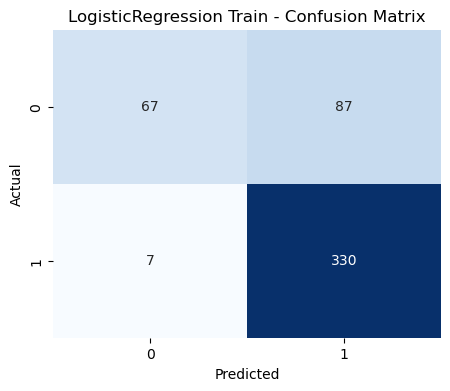

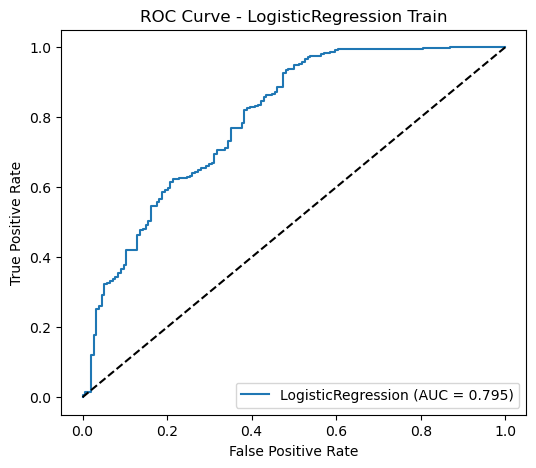

Classification Report: LogisticRegression Test
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



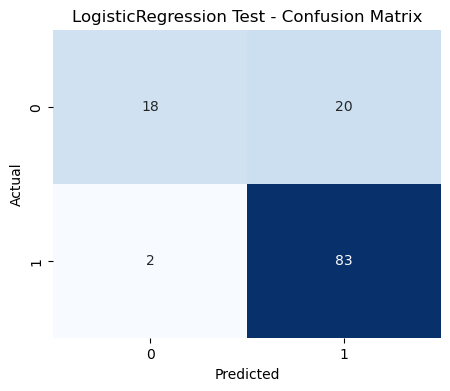

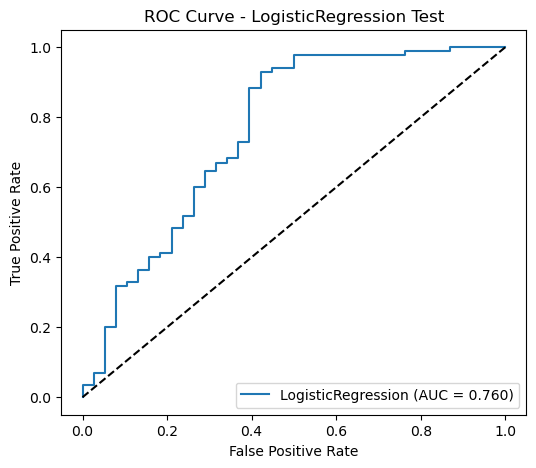

Classification Report: DecisionTree Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



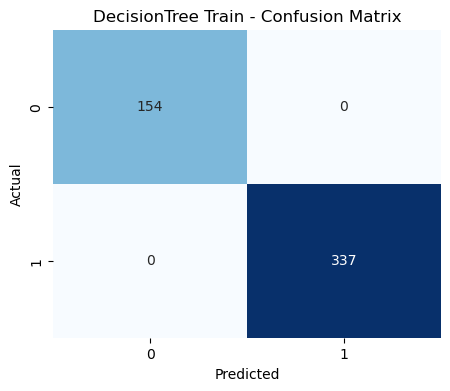

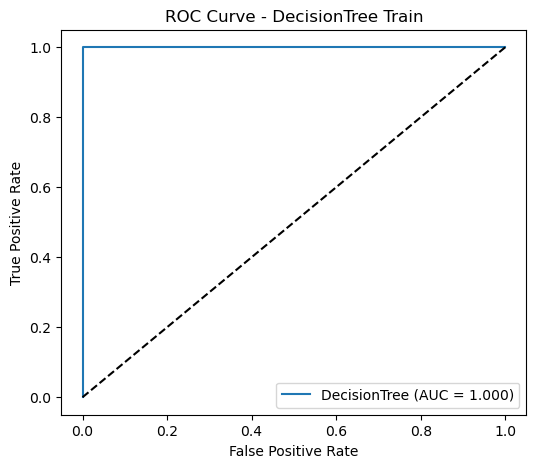

Classification Report: DecisionTree Test
              precision    recall  f1-score   support

           0       0.56      0.66      0.60        38
           1       0.83      0.76      0.80        85

    accuracy                           0.73       123
   macro avg       0.69      0.71      0.70       123
weighted avg       0.75      0.73      0.74       123



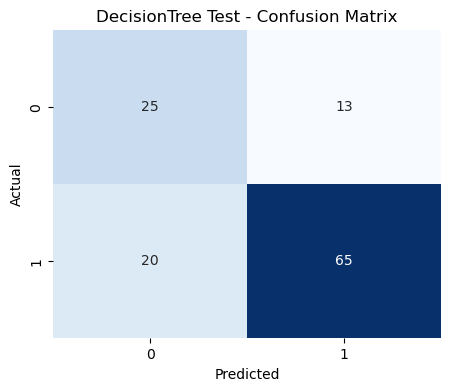

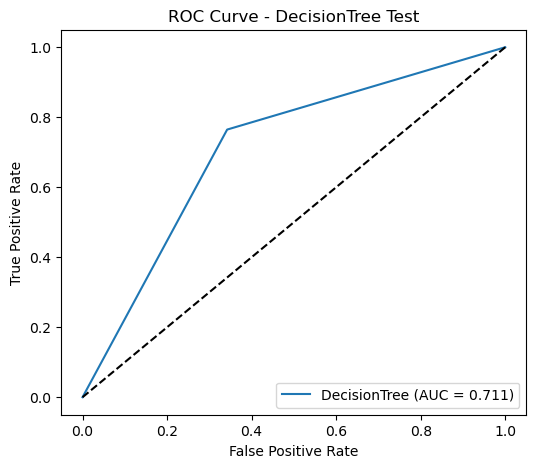

Classification Report: KNN Train
              precision    recall  f1-score   support

           0       0.61      0.34      0.44       154
           1       0.75      0.90      0.82       337

    accuracy                           0.73       491
   macro avg       0.68      0.62      0.63       491
weighted avg       0.71      0.73      0.70       491



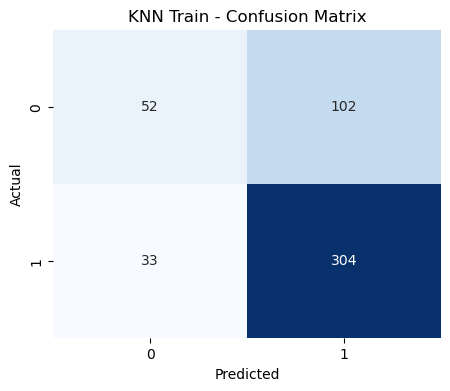

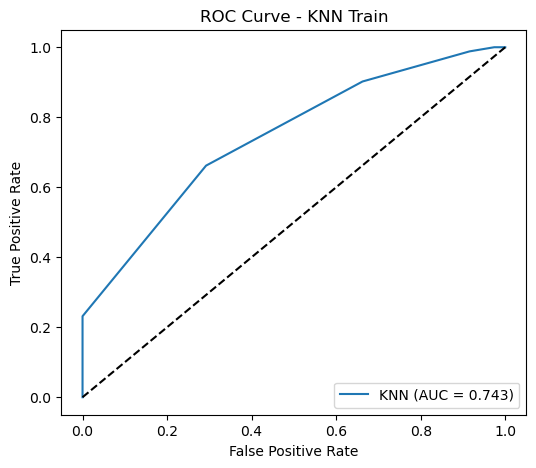

Classification Report: KNN Test
              precision    recall  f1-score   support

           0       0.50      0.26      0.34        38
           1       0.73      0.88      0.80        85

    accuracy                           0.69       123
   macro avg       0.61      0.57      0.57       123
weighted avg       0.66      0.69      0.66       123



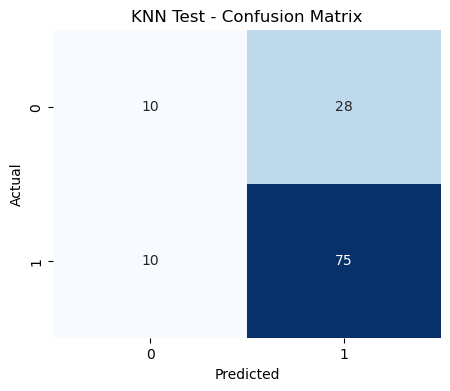

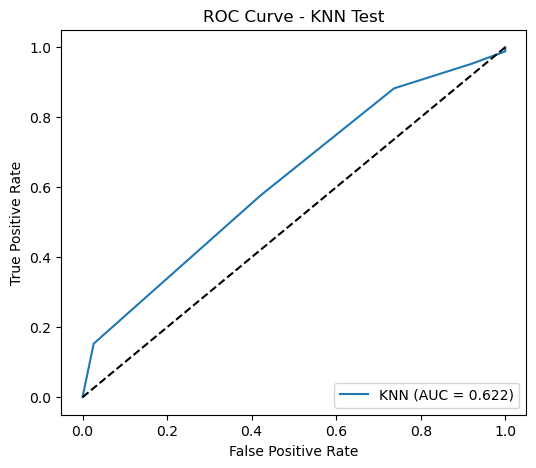

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_train_proba = model.decision_function(X_train)
        y_test_proba = model.decision_function(X_test)
    
    base_train_metrics = log_metrics(name, y_train, y_train_pred, y_train_proba, base_train_metrics, train_or_test='Train')
    base_test_metrics = log_metrics(name, y_test, y_test_pred, y_test_proba, base_test_metrics, train_or_test='Test')

### 3. Record these values in the comparison table.

In [20]:
base_train_metrics

,model,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,LogisticRegression,0.808554,0.791367,0.979228,0.875332,0.794520,"[[67, 87], [7, 330]]"
1,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,"[[154, 0], [0, 337]]"
2,KNN,0.725051,0.748768,0.902077,0.818304,0.743314,"[[52, 102], [33, 304]]"


In [21]:
base_test_metrics

,model,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,LogisticRegression,0.821138,0.805825,0.976471,0.882979,0.759752,"[[18, 20], [2, 83]]"
1,DecisionTree,0.731707,0.833333,0.764706,0.797546,0.711300,"[[25, 13], [20, 65]]"
2,KNN,0.691057,0.728155,0.882353,0.797872,0.621981,"[[10, 28], [10, 75]]"


## Exercise 3: Ensemble Models

1. Apply the following ensemble algorithms: 
- Random Forest (Bagging)
- AdaBoost
- Gradient Boosting
- XGBoost 

2. For each model:
- Train and test
- Print confusion matrix, accuracy, precision, recall, F1-score, ROC AUC
- Plot ROC curve 

In [22]:
ensembel_models = {
    "Random Forest (Bagging)": RandomForestClassifier(random_state=10),
    "AdaBoost": AdaBoostClassifier(random_state=10),
    "Gradient Boosting": GradientBoostingClassifier(random_state=10),
    "XGBoost": XGBClassifier(random_state=10)
}

In [23]:
ensembel_train_metrics = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc','confusion_matrix'])
ensembel_test_metrics = ensembel_train_metrics.copy()

Classification Report: Random Forest (Bagging) Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



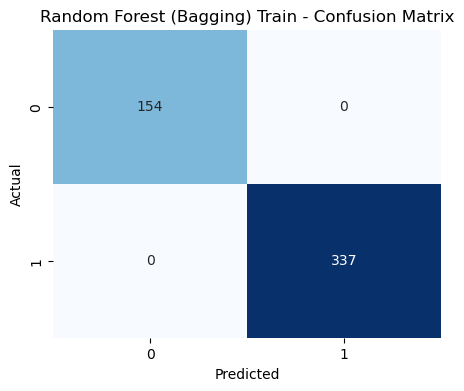

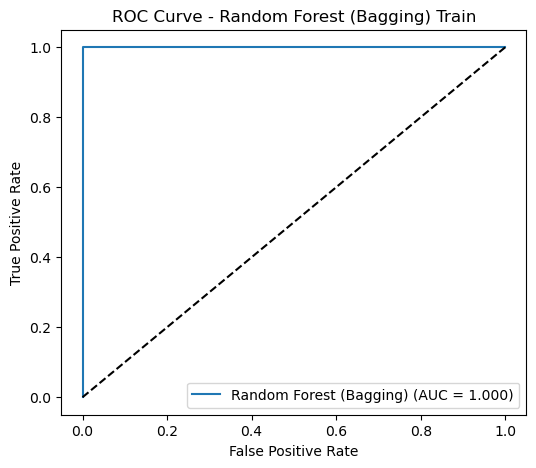

Classification Report: Random Forest (Bagging) Test
              precision    recall  f1-score   support

           0       0.75      0.47      0.58        38
           1       0.80      0.93      0.86        85

    accuracy                           0.79       123
   macro avg       0.77      0.70      0.72       123
weighted avg       0.78      0.79      0.77       123



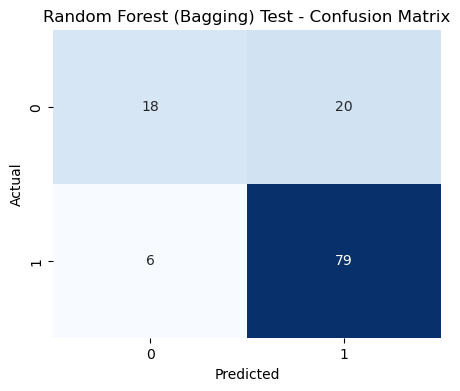

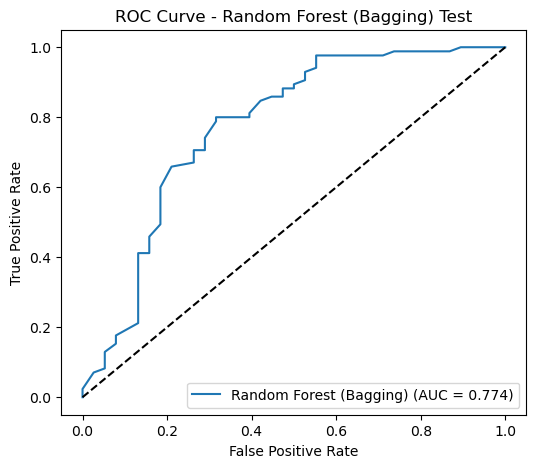

Classification Report: AdaBoost Train
              precision    recall  f1-score   support

           0       0.93      0.44      0.59       154
           1       0.79      0.99      0.88       337

    accuracy                           0.81       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.81      0.79       491



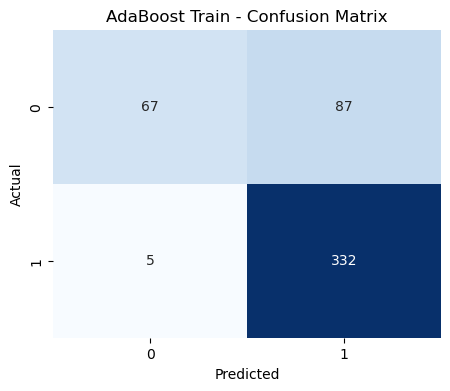

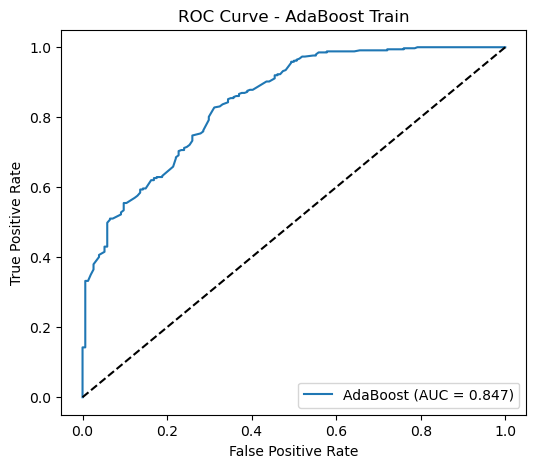

Classification Report: AdaBoost Test
              precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.80      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123



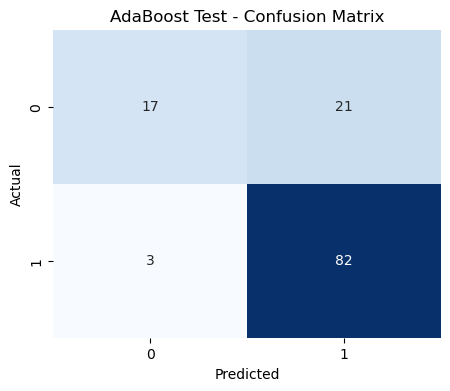

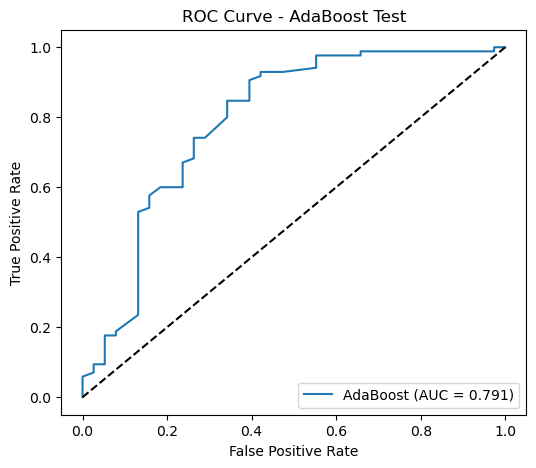

Classification Report: Gradient Boosting Train
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       154
           1       0.87      1.00      0.93       337

    accuracy                           0.90       491
   macro avg       0.94      0.84      0.87       491
weighted avg       0.91      0.90      0.89       491



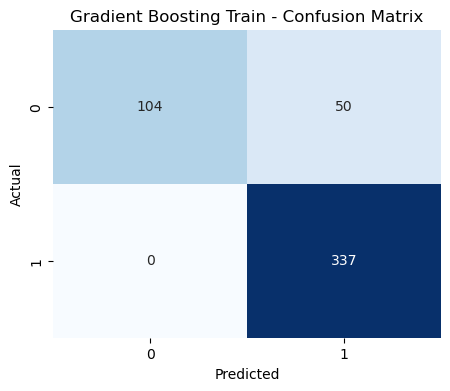

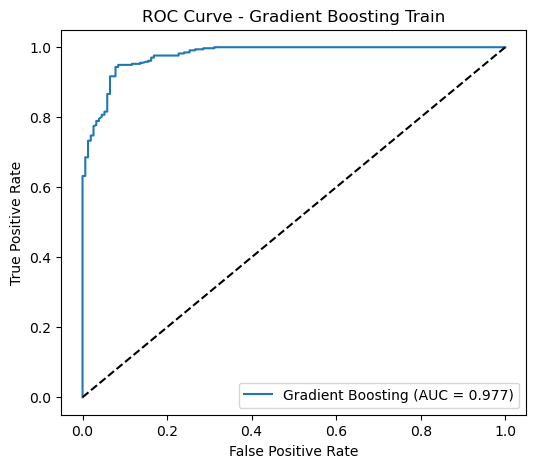

Classification Report: Gradient Boosting Test
              precision    recall  f1-score   support

           0       0.86      0.47      0.61        38
           1       0.80      0.96      0.88        85

    accuracy                           0.81       123
   macro avg       0.83      0.72      0.74       123
weighted avg       0.82      0.81      0.79       123



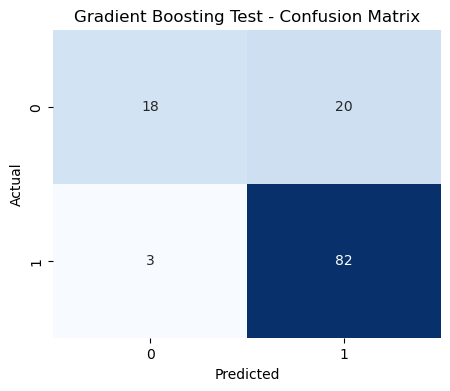

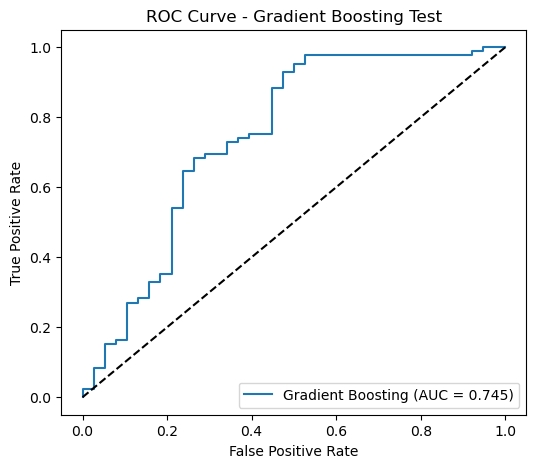

Classification Report: XGBoost Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



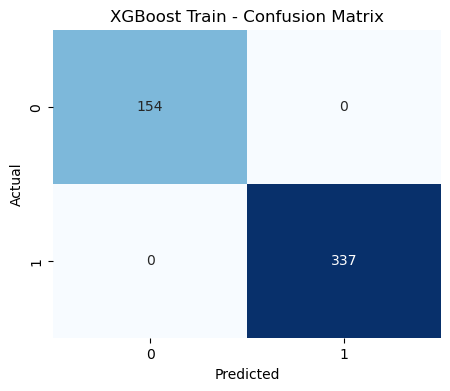

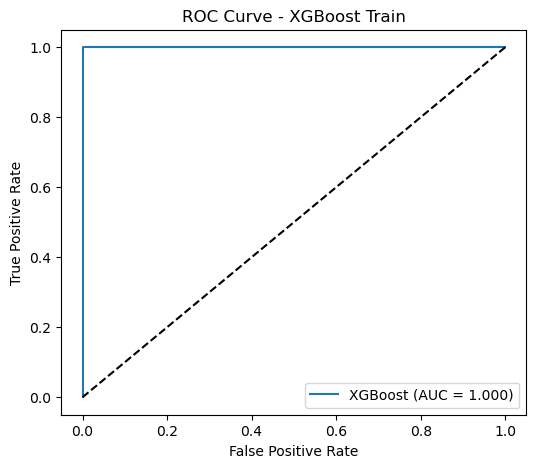

Classification Report: XGBoost Test
              precision    recall  f1-score   support

           0       0.72      0.55      0.63        38
           1       0.82      0.91      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.73      0.74       123
weighted avg       0.79      0.80      0.79       123



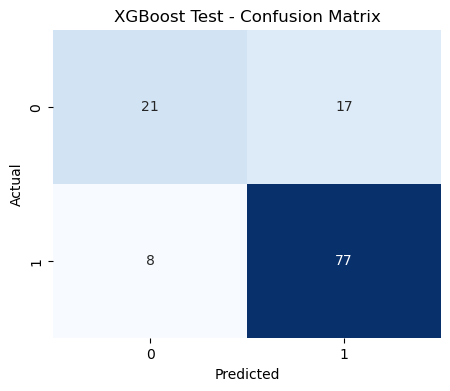

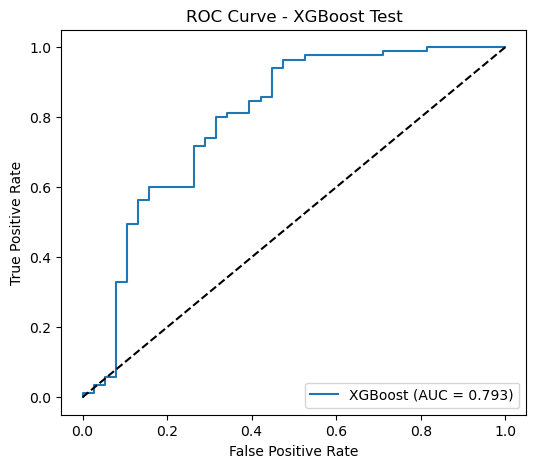

In [24]:
for name, model in ensembel_models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_train_proba = model.decision_function(X_train)
        y_test_proba = model.decision_function(X_test)
    
    ensembel_train_metrics = log_metrics(name, y_train, y_train_pred, y_train_proba, ensembel_train_metrics, train_or_test='Train')
    ensembel_test_metrics = log_metrics(name, y_test, y_test_pred, y_test_proba, ensembel_test_metrics, train_or_test='Test')

In [25]:
ensembel_train_metrics

,model,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,Random Forest (Bagging),1.000000,1.000000,1.000000,1.000000,1.000000,"[[154, 0], [0, 337]]"
1,AdaBoost,0.812627,0.792363,0.985163,0.878307,0.846892,"[[67, 87], [5, 332]]"
2,Gradient Boosting,0.898167,0.870801,1.000000,0.930939,0.977340,"[[104, 50], [0, 337]]"
3,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,"[[154, 0], [0, 337]]"


In [26]:
ensembel_test_metrics

,model,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,Random Forest (Bagging),0.788618,0.797980,0.929412,0.858696,0.773839,"[[18, 20], [6, 79]]"
1,AdaBoost,0.804878,0.796117,0.964706,0.872340,0.791486,"[[17, 21], [3, 82]]"
2,Gradient Boosting,0.813008,0.803922,0.964706,0.877005,0.744582,"[[18, 20], [3, 82]]"
3,XGBoost,0.796748,0.819149,0.905882,0.860335,0.793189,"[[21, 17], [8, 77]]"


## Exercise 4: Stacking 

### 1. Use Logistic Regression, Decision Tree, and KNN as base models. 

In [27]:
base_models = [
    ('LogisticRegression', LogisticRegression(random_state=10)),
    ('DecisionTree', DecisionTreeClassifier(random_state=10)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

### 2. Use Random Forest as the meta-learner. 

In [28]:
metalearner = RandomForestClassifier(random_state=10)

### 3. Implement stacking using sklearn.ensemble.StackingClassifier 

In [29]:
sc = StackingClassifier(base_models, final_estimator=metalearner)

In [30]:
sc.fit(X_train, y_train)

StackingClassifier(estimators=[('LogisticRegression',
                                LogisticRegression(random_state=10)),
                               ('DecisionTree',
                                DecisionTreeClassifier(random_state=10)),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier(random_state=10))

In [31]:
y_train_pred = sc.predict(X_train)
y_train_proba = sc.predict_proba(X_train)[:,1]

y_test_pred = sc.predict(X_test)
y_test_proba = sc.predict_proba(X_test)[:,1]

### 4. Evaluate on test set and compare with previous results. 

In [32]:
stacking_train_metrics = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc','confusion_matrix'])
stacking_test_metrics = stacking_train_metrics.copy()

Classification Report: StackingClassifier Train
              precision    recall  f1-score   support

           0       0.55      0.52      0.54       154
           1       0.79      0.81      0.80       337

    accuracy                           0.72       491
   macro avg       0.67      0.66      0.67       491
weighted avg       0.71      0.72      0.71       491



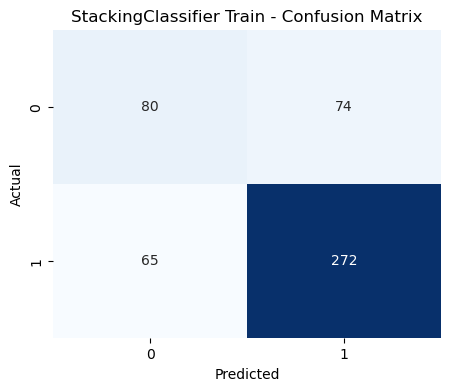

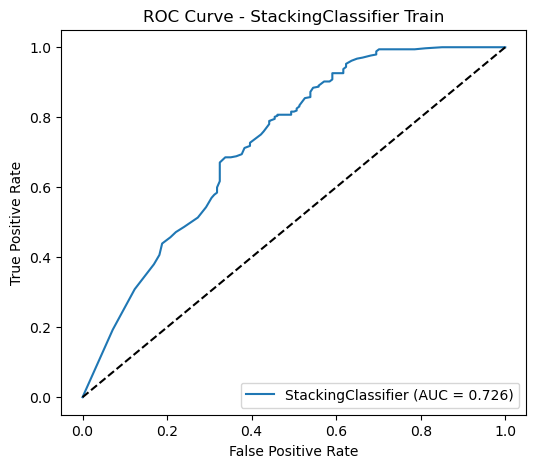

Classification Report: StackingClassifier Test
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        38
           1       0.82      0.80      0.81        85

    accuracy                           0.74       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.74      0.74      0.74       123



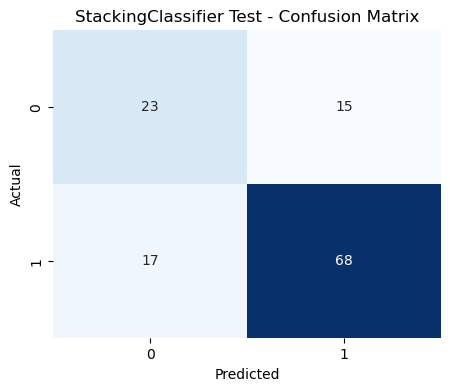

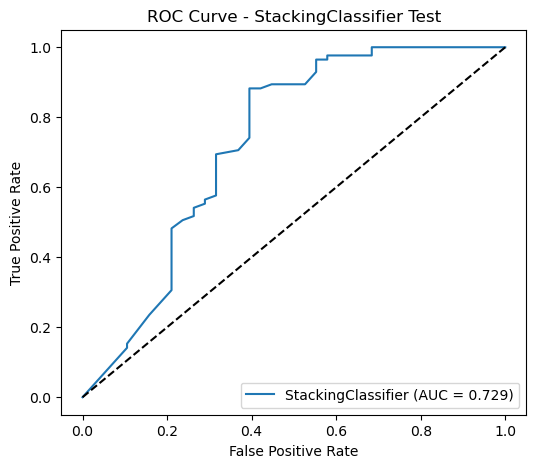

In [33]:
stacking_train_metrics = log_metrics("StackingClassifier", y_train, y_train_pred, y_train_proba, stacking_train_metrics, train_or_test='Train')
stacking_test_metrics = log_metrics("StackingClassifier", y_test, y_test_pred, y_test_proba, stacking_test_metrics, train_or_test='Test')

In [34]:
stacking_train_metrics

,model,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,StackingClassifier,0.716904,0.786127,0.807122,0.796486,0.72629,"[[80, 74], [65, 272]]"


In [35]:
stacking_test_metrics

,model,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,StackingClassifier,0.739837,0.819277,0.8,0.809524,0.728793,"[[23, 15], [17, 68]]"


## Exercise 5: Model Comparison Table 

In [36]:
train_metrics = pd.concat([base_train_metrics, ensembel_train_metrics, stacking_train_metrics], ignore_index=True).sort_values(by="accuracy", ascending=False)
test_metrics = pd.concat([base_test_metrics, ensembel_test_metrics, stacking_test_metrics], ignore_index=True).sort_values(by="accuracy", ascending=False)

In [37]:
train_metrics

,model,accuracy,precision,recall,f1,roc_auc,confusion_matrix
1,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,"[[154, 0], [0, 337]]"
3,Random Forest (Bagging),1.000000,1.000000,1.000000,1.000000,1.000000,"[[154, 0], [0, 337]]"
6,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,"[[154, 0], [0, 337]]"
5,Gradient Boosting,0.898167,0.870801,1.000000,0.930939,0.977340,"[[104, 50], [0, 337]]"
4,AdaBoost,0.812627,0.792363,0.985163,0.878307,0.846892,"[[67, 87], [5, 332]]"
0,LogisticRegression,0.808554,0.791367,0.979228,0.875332,0.794520,"[[67, 87], [7, 330]]"
2,KNN,0.725051,0.748768,0.902077,0.818304,0.743314,"[[52, 102], [33, 304]]"
7,StackingClassifier,0.716904,0.786127,0.807122,0.796486,0.726290,"[[80, 74], [65, 272]]"


In [38]:
test_metrics

,model,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,LogisticRegression,0.821138,0.805825,0.976471,0.882979,0.759752,"[[18, 20], [2, 83]]"
5,Gradient Boosting,0.813008,0.803922,0.964706,0.877005,0.744582,"[[18, 20], [3, 82]]"
4,AdaBoost,0.804878,0.796117,0.964706,0.872340,0.791486,"[[17, 21], [3, 82]]"
6,XGBoost,0.796748,0.819149,0.905882,0.860335,0.793189,"[[21, 17], [8, 77]]"
3,Random Forest (Bagging),0.788618,0.797980,0.929412,0.858696,0.773839,"[[18, 20], [6, 79]]"
7,StackingClassifier,0.739837,0.819277,0.800000,0.809524,0.728793,"[[23, 15], [17, 68]]"
1,DecisionTree,0.731707,0.833333,0.764706,0.797546,0.711300,"[[25, 13], [20, 65]]"
2,KNN,0.691057,0.728155,0.882353,0.797872,0.621981,"[[10, 28], [10, 75]]"


## Knowlage Check

1.	What is the advantage of Random Forest over a single Decision Tree?

Random Forest reduces overfitting and variance compared to a single Decision Tree by averaging predictions from many trees trained on random subsets of data and features. This ensemble approach gives better generalization and stability.

2.	When should you use boosting instead of bagging? 

Use boosting when:
- You want to reduce bias and improve model accuracy.
- Your base learners (like shallow trees) underfit the data. In contrast, bagging is better for reducing variance when models overfit.

3.	What is the role of a meta-learner in stacking? 

The meta-learner (or level-2 model) learns how to combine predictions from multiple base learners.
It figures out which base model to trust more for specific situations, improving overall prediction accuracy.

4.	How does ensemble learning reduce overfitting? 

By combining multiple models, ensemble learning averages out individual model errors.
Random errors or overfitting tendencies of single models cancel each other, resulting in more stable, generalized predictions.

5.	What challenges may arise while using stacking with very different base learners? 

- Different scales or output distributions among base models can confuse the meta-learner.
- Increased computational cost (training multiple complex models).
- Risk of overfitting if meta-learner or base learners are not properly cross-validated.
- Model interpretability drops significantly.